In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#We then upload the dataset after downloading.
data = pd.read_csv("advertising.csv")

In [4]:
#Let us then check the first ten elements of the data.
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [5]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
#We define shape to see the overal layout of the dataset.
data.shape

(200, 4)

In [7]:
#We have a total of 200 rows and 4 columns.
#Let us then check the statistical layout of the dataset.
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Visualization.

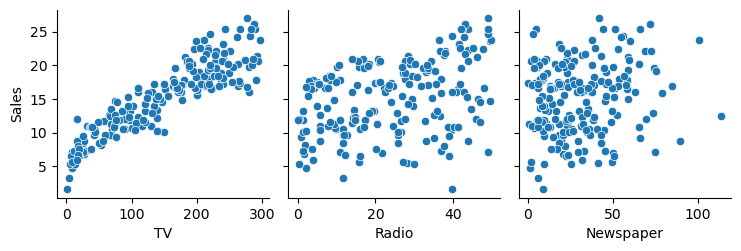

In [9]:
#We therefore do a pair plot to paint a better picture.

sns.pairplot(data, x_vars=["TV", "Radio", "Newspaper"], y_vars=["Sales"], kind="scatter", diag_kind='kde')
plt.show()

In [11]:
#From the scatter plot,Tv sales increase exponentially,while the sales for Radio and Newspaper are uncertain.

<Axes: ylabel='Frequency'>

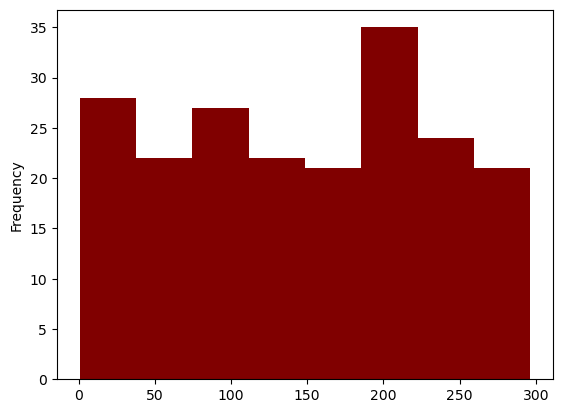

In [12]:
#Further visualization scrutiny will shed some light.
data["TV"].plot.hist(bins=8,color='maroon')

<Axes: ylabel='Frequency'>

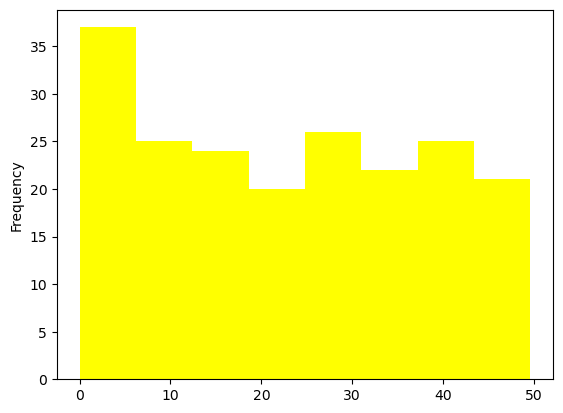

In [13]:
data["Radio"].plot.hist(bins=8,color='yellow')

<Axes: ylabel='Frequency'>

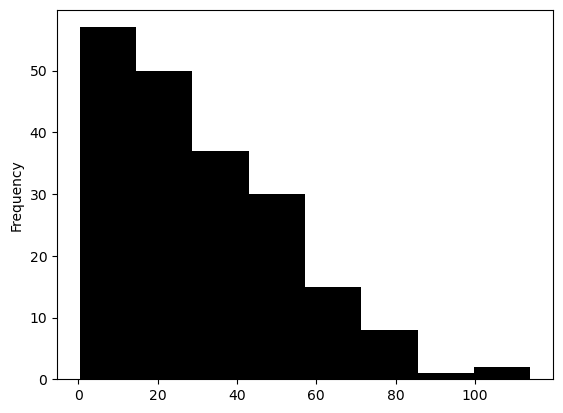

In [14]:
data["Newspaper"].plot.hist(bins=8,color='black')

From the histograms,we can see that little advertising was done Newspaper hence the graph.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


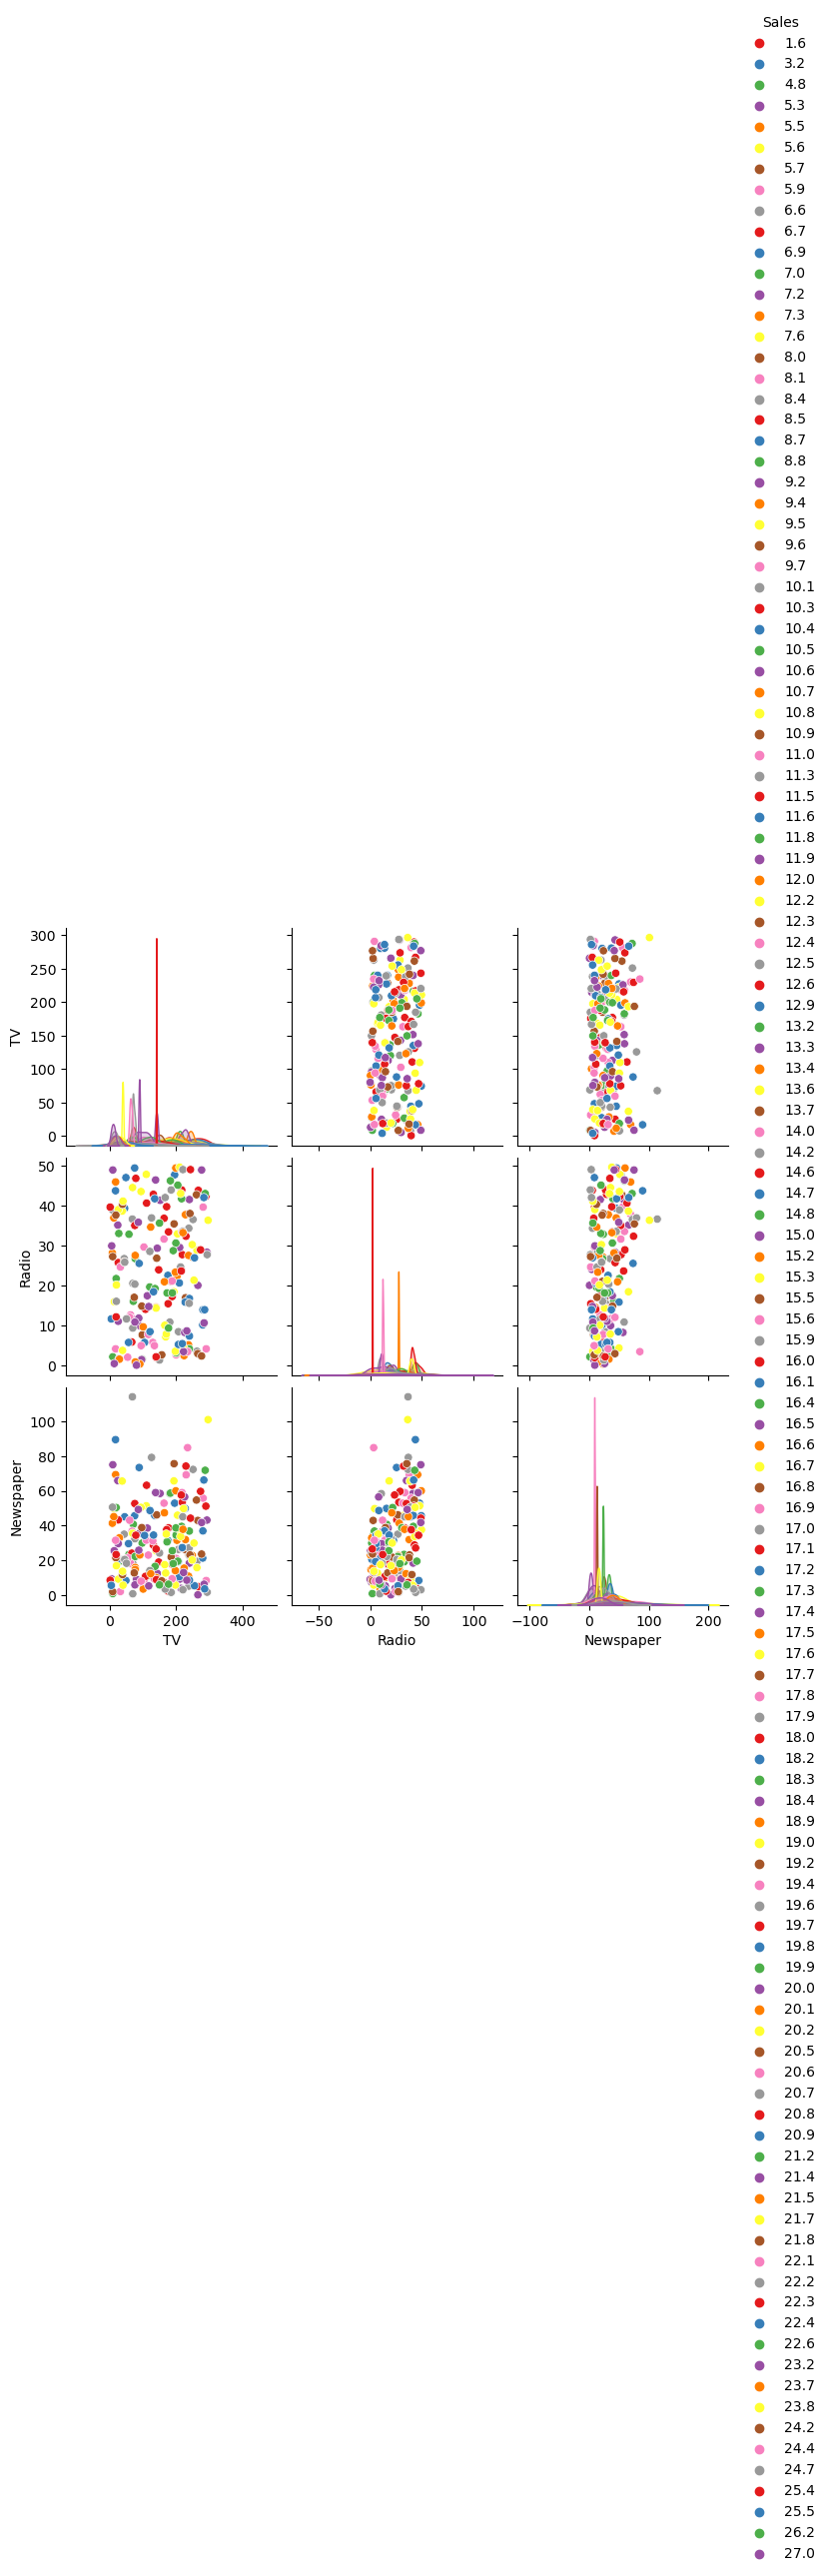

In [15]:
#From our visualizations,we can see that sales is highly inclined and correlated to TV advertising.
#We will therefore fit a linear regression model.

#We therefore do a pair plot to paint a better picture.
sns.pairplot(data[["TV","Radio","Newspaper","Sales"]], hue="Sales",diag_kind='kde',palette='Set1')

In [16]:
#We will therefore fit a linear regression model.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data[['TV']],data[['Sales']],test_size = 0.25,random_state = 0)

In [17]:
print(X_train.shape)

(150, 1)


In [18]:
print(X_train)

        TV
71   109.8
124  229.5
184  253.8
97   184.9
149   44.7
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[150 rows x 1 columns]


In [19]:
print(y_train.shape)

(150, 1)


In [20]:
print(y_train)

     Sales
71    12.4
124   19.7
184   17.6
97    20.5
149   10.1
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[150 rows x 1 columns]


In [21]:
print(X_test.shape)

(50, 1)


In [22]:
print(X_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
63   102.7
8      8.6
75    16.9
118  125.7
143  104.6


In [23]:
print(y_test.shape)

(50, 1)


In [24]:
print(y_test)

     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    16.1
159   12.9
60     8.1
123   15.2
179   17.6
185   22.6
122   16.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     17.9
83    13.6
106    7.2
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1
63    14.0
8      4.8
75     8.7
118   15.9
143   10.4


In [25]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
prediction = model.predict(X_test)
print(prediction)

[[10.90227673]
 [ 9.85532218]
 [12.05828903]
 [22.92589531]
 [16.40969385]
 [10.19340125]
 [ 7.60327934]
 [20.22126274]
 [ 8.42666546]
 [17.90378523]
 [21.37727504]
 [11.88379661]
 [15.66810105]
 [17.36940218]
 [11.29488468]
 [13.68324973]
 [21.61174924]
 [ 7.16704828]
 [11.20218558]
 [18.76534158]
 [22.81138465]
 [14.77928027]
 [16.67688538]
 [14.31033188]
 [10.04617327]
 [13.84138349]
 [16.15886099]
 [18.30729896]
 [19.34334773]
 [ 8.49755301]
 [10.82593629]
 [17.97467278]
 [22.43513536]
 [20.30850895]
 [ 7.84865931]
 [ 8.14856816]
 [10.37879945]
 [16.98770001]
 [10.85865362]
 [ 8.49210012]
 [ 9.14099382]
 [ 8.84653786]
 [14.92105536]
 [18.55813182]
 [18.87439934]
 [12.72899429]
 [ 7.59782645]
 [ 8.05041617]
 [13.98315858]
 [12.83259917]]


In [27]:
model.coef_

array([[0.05452888]])

In [28]:
model.intercept_

array([7.12887806])

In [29]:
#The model therefore succesfully predicts the X values of TV at a certain level of accuracy.
0.05452888*50 + 7.12887806

9.855322059999999

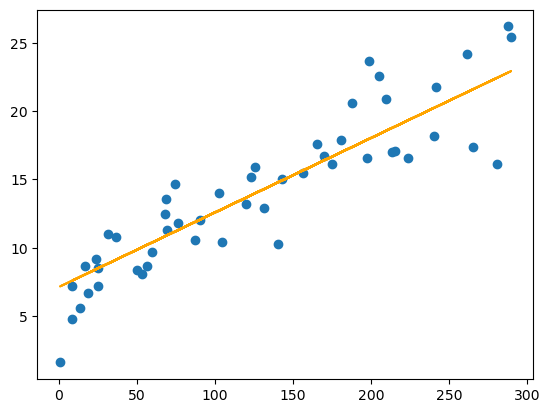

In [30]:
plt.scatter(X_test,y_test)
plt.plot(X_test,7.12887806 + 0.05452888 * X_test,'orange')
plt.show()